In [3]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["figure.figsize"] = [8, 5.3]

ModuleNotFoundError: No module named 'keras'

## Ejemplo: El problema de los sobornos con redes neuronales

In [3]:
# This code generates the bribes dataset. No need to understand it, it is just to avoid to have to 
# upload the csv to colab.
def simulate_bribes():
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))


    np.random.seed(69)
    n = 1024
    sobornos = np.random.uniform(size=(n,)) * 200 + 100
    notas = 10 * sigmoid(2 * (sobornos - 200) / 46)
    sobornos = sobornos + 8 * np.random.normal(size=(n,))
    sobornos /= 100

    # With neural networks, data always should have matrix shape
    X = notas.reshape(-1, 1)
    y = sobornos.reshape(-1, 1)

    return X, y



MSE al final del entrenamiento es 0.009466591291129589
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step


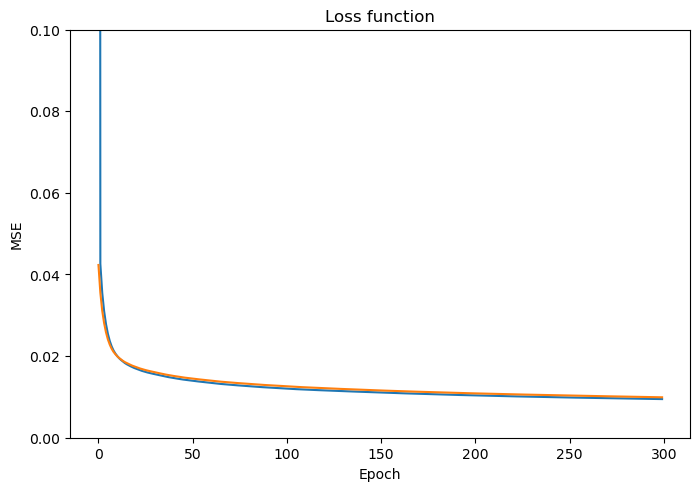

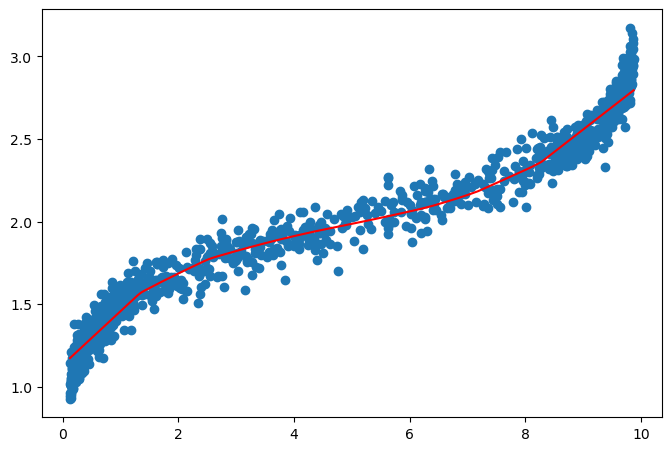

In [ ]:
keras.utils.set_random_seed(813)

X, y = simulate_bribes()
# It is a good idea to alway normalize the input data
X_normalized = (X - X.mean(axis=0)) / X.std(axis=0)

model = keras.Sequential([
    keras.layers.InputLayer(shape=(1,)),
    keras.layers.Dense(512, activation='leaky_relu'),
    keras.layers.Dense(1, activation=None),
])
# print(model.summary())
optimizer = keras.optimizers.SGD(learning_rate = 1e-1)

model.compile(optimizer=optimizer, loss='mse')

# Note the batch size: it is the number of samples used to compute the gradient
# 300 epochs and split 20% of the data for validation
history = model.fit(X_normalized, y, batch_size=128, epochs=300, verbose=0, 
                    validation_split=0.2)

# We can plot the loss function to see how it evolves
plt.plot(history.history['loss'], label="Train")
plt.plot(history.history['val_loss'], label="Validation")
plt.ylim(0, 0.1)
plt.title("Loss function")
plt.xlabel("Epoch")
plt.ylabel("MSE")
print(f"MSE al final del entrenamiento es {history.history['loss'][-1]}")

# Now plot the predictions. Recall that we should be using a train-test split. This is just for 
# simplicity
plt.figure()
plt.scatter(X.flatten(), y.flatten())
# sort by X to avoid plotting artifacts
sort_idx = np.argsort(X.flatten())
preds = model.predict(X_normalized[sort_idx])
plt.plot(X.flatten()[sort_idx], preds.flatten(), c='red')

### Ejercicio: Modificando la arquitectura, optimizador y otros hiperparámetros
Modifica el anterior fragmento de código para ....
1. Tener dos capas ocultas con 512 hidden units. Usa la activación "relu" en ambas capas.
2. Usar un optimizador distinto: Adam con lr = 1e-3
2. Entrenar usando 200 epochs y un batch_size de 64.

In [ ]:
X, y = simulate_bribes()
# ...
# It is a good idea to alway normalize the input data
X_normalized = (X - X.mean(axis=0)) / X.std(axis=0)

model = keras.Sequential([
    keras.layers.InputLayer(shape=(1,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation=None),
])
# print(model.summary())
optimizer = keras.optimizers.SGD(learning_rate = 1e-3)

model.compile(optimizer=optimizer, loss='mse')

# Note the batch size: it is the number of samples used to compute the gradient
history = model.fit(X_normalized, y, batch_size=64, epochs=200, verbose=0, 
                    validation_split=0.2)

# We can plot the loss function to see how it evolves
plt.plot(history.history['loss'], label="Train")
plt.plot(history.history['val_loss'], label="Validation")
plt.ylim(0, 0.1)
plt.title("Loss function")
plt.xlabel("Epoch")
plt.ylabel("MSE")
print(f"MSE al final del entrenamiento es {history.history['loss'][-1]}")

# Now plot the predictions. Recall that we should be using a train-test split. This is just for 
# simplicity
plt.figure()
plt.scatter(X.flatten(), y.flatten())
# sort by X to avoid plotting artifacts
sort_idx = np.argsort(X.flatten())
preds = model.predict(X_normalized[sort_idx])
plt.plot(X.flatten()[sort_idx], preds.flatten(), c='red')

## Ejemplo: PetFinder.my, Clasificación binaria y regularización L2 + Early Stopping
Usaremos el dataset "PetFinder.my mini", en el que se recogen datos de la web de Malasia "PetFinder.my", orientada a la adopción de animales callejeros. El objetivo es predecir si un animal ha sido adoptado o no.

In [1]:
# Downloading the data, no need to understand this code
dataset_url = 'http://storage.googleapis.com/download.tensorflow.org/data/petfinder-mini.zip'
csv_file = 'datasets/petfinder_mini_extracted/petfinder-mini/petfinder-mini.csv'

keras.utils.get_file('petfinder_mini.zip', dataset_url,
                        extract=True, cache_dir='.')
dataframe = pd.read_csv(csv_file)
dataframe['target'] = np.where(dataframe['AdoptionSpeed']==4, 0, 1)
# Drop unused features.
dataframe = dataframe.drop(columns=['AdoptionSpeed', 'Description'])

print(dataframe.head())

NameError: name 'keras' is not defined

In [18]:
# Let's use sklearn to one-hot encode categorial features, normalize numeric ones, and split the data into train, val and test:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from keras import regularizers

X = dataframe.drop(columns=['target'])
y = dataframe['target'].values

cat_columns = ['Type', 'Breed1', 'Gender', 'Color1', 'Color2', 'MaturitySize', 'FurLength', 'Vaccinated', 'Sterilized', 'Health']
num_columns = ['Age', 'Fee', 'PhotoAmt']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown="infrequent_if_exist", sparse_output=False), cat_columns),
        ('standardize', StandardScaler(), num_columns)
    ]
)

X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=234)

X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)


(8075, 185)
Epoch 1/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7067 - loss: 0.2238 - val_accuracy: 0.7475 - val_loss: 0.1772
Epoch 2/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7574 - loss: 0.1753 - val_accuracy: 0.7481 - val_loss: 0.1757
Epoch 3/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7669 - loss: 0.1674 - val_accuracy: 0.7447 - val_loss: 0.1758
Epoch 4/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7780 - loss: 0.1610 - val_accuracy: 0.7377 - val_loss: 0.1772
Epoch 5/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7907 - loss: 0.1542 - val_accuracy: 0.7458 - val_loss: 0.1795


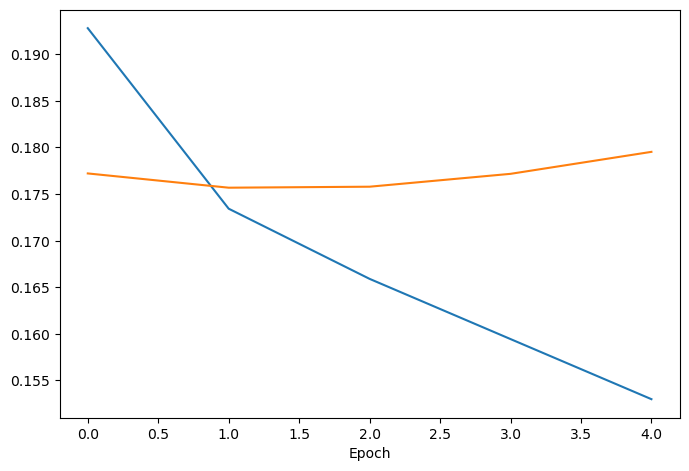

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7834 - loss: 0.1711
[0.17676253616809845, 0.7631427049636841]


In [ ]:
print(X_train.shape)
# Now we can train a neural network
model = keras.Sequential([
        keras.Input(shape=(X_train.shape[1], )),
        # !!!!!!!!!!!!!!!!!!! Let's try L2 regularization !!!!!!!!!!!!!!!!!!!
        keras.layers.Dense(256, activation="relu", kernel_regularizer=regularizers.L2(l2=1e-5)), # Loss = MSE(y, ypreds) + lambda(peso: 1e-5) * w^2
        keras.layers.Dense(256, activation="relu", kernel_regularizer=regularizers.L2(l2=1e-5)),
        keras.layers.Dense(256, activation="relu", kernel_regularizer=regularizers.L2(l2=1e-5)),
        # !!!!!!!!!!!!!!!!!!!!!! Change the activation !!!!!!!!!!!!!!!!!!!!!!
        # !!!!!!!!!!!!!!!!!!!!!! Capa salida !!!!!!!!!!!!!!!!!!!!!! 
        # !!!!!!!!!!!!!!!!!!!!!! It is sooooo wrong !!!!!!!!!!!!!!!!!!!!!!
        keras.layers.Dense(1, activation="sigmoid"), # binaria, una neurona de salida (probabilidad de positivo, p negativo redundante)
])
# !!!!!! Change the loss function !!!!!!
# !!!!!! It is sooooo wrong !!!!!!
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), 
              loss="binary_crossentropy",  # binary_crossentropy para clasificación binaria
              metrics=["accuracy"]
)

# !!!!!!!!!!!!!!!!!!! Add early stopping !!!!!!!!!!!!!!!!!!! 
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    epochs=10, 
    validation_data=(X_val, y_val),
    callbacks=[callback]

)  # función que se ejecuta cuando algo sucede, en este caso, para entrenamiento cuando deja de mejorar

# plot train and val loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epoch')
plt.show()


# !!!!!!!!!!!!!!!!!!! Note the use of evaluation !!!!!!!!!!!!!!!!!!!
results = model.evaluate(X_test, y_test)
print(results)
# early stopping ha decidido que 5 epochs es suficiente, mas de esto empeora

### Ejemplo: MNIST, Clasificación multiclase y regularización con Dropout y BatchNorm
En este ejemplo intentaremos resolver MNIST usando una red neuronal multicapa. Como veremos más adelante, esta aproximación no es óptima.

In [ ]:
# get MNIST dataset, split in train test  and plot some examples
# problema de clasificacion multiclase 
# una imagen es una matriz, 28x28 pixeles, valores de 0 a 255 (8 bits)
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

fig = plt.figure()
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')



# images are 28 x 28 pixels represented as a matrix. Values of this matrix go from 0 to 255
print(X_train[0].shape)
print(X_train[0])

NameError: name 'keras' is not defined

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0981 - loss: 21.8295 - val_accuracy: 0.1135 - val_loss: 9.0222
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1103 - loss: 9.7348 - val_accuracy: 0.1135 - val_loss: 8.3868
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1100 - loss: 9.3913 - val_accuracy: 0.1135 - val_loss: 8.7309
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1104 - loss: 9.0909 - val_accuracy: 0.1135 - val_loss: 8.4430
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1100 - loss: 8.9515 - val_accuracy: 0.1135 - val_loss: 8.4120
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1100 - loss: 8.8322 - val_accuracy: 0.1135 - val_loss: 8.4083
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1100 - loss: 8.6955 - val_accuracy: 0.1135 - val_loss: 8.3858
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1100 - loss: 8.7132 - val_accuracy: 0

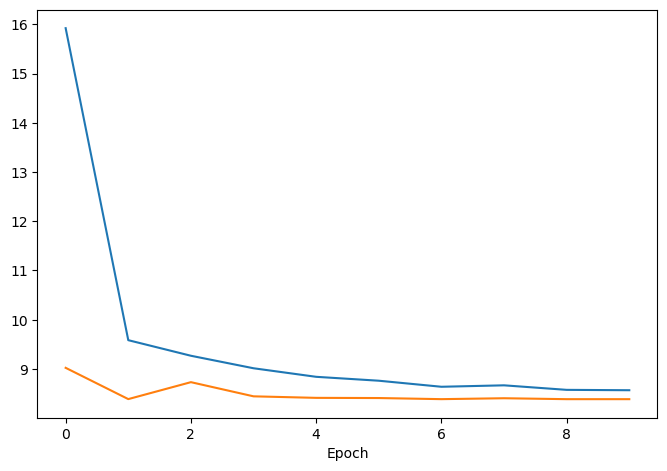

In [ ]:
# Normalize data
X_train = X_train / 255
X_test = X_test / 255

# Let's subset the data for faster training. Don't do this on real data!
X_train = X_train[:10000]
y_train = y_train[:10000]

# build the model with a flatten layer. 
# !!!!!!!!!!!!!!!!!!! Use Dropout and BatchNormalization !!!!!!!!!!!!!!!!!!!
# This is just for illustration purposes. While both can be used together, some research 
# suggests they might be partially redundant since both techniques help with regularization.
# You might need to tune the dropout rate when using it with BatchNorm.
# esto es un poco regular, no la mejor forma de implementarlo, solo para el ejemplo
model = keras.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(), # convierte la matriz en un vector gigantesco
    keras.layers.Dense(128, activation='relu'), # red neuronal densa con 128 neuronas
    keras.layers.Dropout(0.2), # 20% de las neuronas se apagan aleatoriamente
    keras.layers.BatchNormalization(), # normaliza la salida de la capa anterior
    keras.layers.Dense(128, activation='relu'), # repito
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    # !!!!!!!!!!!!!!!!!!! Change the activation !!!!!!!!!!!!!!!!!!!
    # !!!!!!!!!!!!!!!!!!! It is sooooo wrong !!!!!!!!!!!!!!!!!!!
    keras.layers.Dense(10, activation="softmax") # 10 clases (0-9), una neurona por clase, tienen que sumar 1 (funcion softmax)
])

# !!!!!!!!!!!!!!!!!!! Change the loss function !!!!!!!!!!!!!!!!!!!
# !!!!!!!!!!!!!!!!!!! It is sooooo wrong !!!!!!!!!!!!!!!!!!!
# En categorical classification
# y_oh = [0,0,1,0,...,0] ==> "categorical crossentropy"
# y = 2 ==> "sparse categorical crossentropy"
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epoch')


print(model.evaluate(X_test, y_test))

